In [1]:
import numpy as np
import pandas as pd
import yfinance as yf 

import math
import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import QuantileRegressor
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from scipy.stats import norm

from sklearn import ensemble

import tensorflow as tf
from tensorflow import keras

In [2]:
df_dax = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^GDAXI")

[*********************100%***********************]  1 of 1 completed


In [3]:
# Data Import 
df_dax = pd.DataFrame(df_dax)

data = df_dax

In [6]:
data_close = data['Close']

#Roling Window 1000 Steps
data_roling = data_close[-1000:]
data_roling = data_close['1991-11-07':]

#Expanding Window startig at 2017-11-07
data_extending = data_close['2017-11-07':]


In [7]:


data_close

Date
1987-12-30     1005.190002
1988-01-04      956.489990
1988-01-05      996.099976
1988-01-06     1006.010010
1988-01-07     1014.469971
                  ...     
2022-01-20    15912.330078
2022-01-21    15603.879883
2022-01-24    15011.129883
2022-01-25    15123.870117
2022-01-26    15435.290039
Name: Close, Length: 8608, dtype: float64

In [8]:
#Return Function
def compute_return(y, h):
    n = len(y)
    y2 = y[h] # exclude first h observations
    y1 = y[0] # exclude last h observations # compute h-step cumulative returns
    
    return 100*(math.log(y2)-math.log(y1))



In [9]:
data_roling

Date
1991-11-07     1582.060059
1991-11-08     1610.180054
1991-11-11     1605.160034
1991-11-12     1623.839966
1991-11-13     1615.260010
                  ...     
2022-01-20    15912.330078
2022-01-21    15603.879883
2022-01-24    15011.129883
2022-01-25    15123.870117
2022-01-26    15435.290039
Name: Close, Length: 7644, dtype: float64

In [10]:
returns_1 = []
returns_2 = []
returns_3 = []
returns_4 = []
returns_5 = []


data_roling = df_dax["Close"]
for i in range(1,(len(data_roling)-6)):
        
        returns1 = compute_return(data_roling[i:i+6], 1)
        returns2 = compute_return(data_roling[i:i+6], 2)
        returns3 = compute_return(data_roling[i:i+6], 3)
        returns4 = compute_return(data_roling[i:i+6], 4)
        returns5 = compute_return(data_roling[i:i+6], 5)
        
        
        returns_1.append(returns1)
        returns_2.append(returns2)
        returns_3.append(returns3)
        returns_4.append(returns4)
        returns_5.append(returns5)
        
  



df_returns = pd.DataFrame([ 
               returns_1, 
               returns_2,
               returns_3,
               returns_4,
               returns_5,])
df_returns

A = np.array([ 
               returns_1, 
               returns_2,
               returns_3,
               returns_4,
               returns_5,])

In [11]:
df_returns.loc[4].values.tolist()

[3.192644568008518,
 -0.9289030410694288,
 -4.082156982666518,
 -4.023806476917535,
 -7.504712280566839,
 1.568362608438978,
 -0.6822378434996779,
 -0.5534215514209073,
 -2.6221839827131,
 1.4612450564894353,
 -4.121126854828727,
 -1.22355644573231,
 -0.08020577762772874,
 -1.216759099408371,
 -3.2045108525072585,
 -1.162944031271973,
 -1.3088009045341131,
 1.2961803562039798,
 5.4433047935030565,
 4.530424690202306,
 3.657970522123133,
 2.8511781794704483,
 2.5339934937633757,
 3.4218238545355106,
 5.3776970387492184,
 6.1306788620103525,
 7.110122692509169,
 5.476371200839569,
 2.6245952127666783,
 1.2777398847590327,
 0.9607301689200654,
 1.2481345634310692,
 1.5665579897239823,
 3.69992948656499,
 3.0686540188024303,
 2.2270626665865656,
 1.6964180977203647,
 0.9803102362854865,
 -0.8602359368969026,
 -0.39637647782697627,
 -0.5525948417589355,
 -0.7292003087267851,
 -0.16858695669563772,
 0.02772095325953572,
 -0.15638738959768972,
 -0.5099422423543665,
 0.803673052239251,
 1.8499

In [12]:
for i in range(5):
    returns =df_returns.loc[i].values.tolist()
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)
    returns.append( math.nan)

    
    df_dax[f"{i+1}Day Return"] = returns

In [13]:
df_dax

,Open,High,Low,Close,Adj Close,Volume,1Day Return,2Day Return,3Day Return,4Day Return,5Day Return
Date,,,,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,4.057731,5.047698,5.885123,7.082493,3.192645
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,0.989967,1.827393,3.024763,-0.865086,-0.928903
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,0.837426,2.034796,-1.855053,-1.918870,-4.082157
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,1.197370,-2.692479,-2.756296,-4.919583,-4.023806
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,-3.889849,-3.953666,-6.116953,-5.221176,-7.504712
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,15837.240234,15912.330078,15737.330078,15912.330078,15912.330078,62979800,NaN,NaN,NaN,NaN,NaN
2022-01-21,15694.820312,15728.290039,15456.870117,15603.879883,15603.879883,105899500,NaN,NaN,NaN,NaN,NaN
2022-01-24,15499.610352,15587.389648,14952.669922,15011.129883,15011.129883,115815500,NaN,NaN,NaN,NaN,NaN


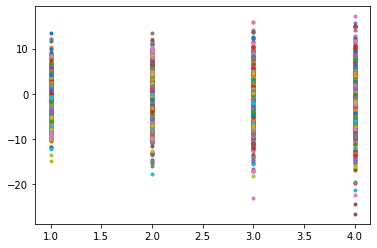

In [14]:
plt.plot(df_returns[1:], '.')
plt.show()

In [15]:
tau = [2.5, 25, 50, 75, 97.5]

pred_baseline = []

df = pd.DataFrame()

for i in range(0,5) : 
    
    for j in range(0,5): 
        pred_baseline.append(np.percentile(A[i], tau[j]))
        
      

  
  
print(pred_baseline)    
    
pred_baseline = pred_baseline    
x = np.reshape(pred_baseline, (5, 5))

print(x)
pred_baseline = x

[-2.86090584818508, -0.6320605018380832, 0.08134863163533623, 0.7446841147695338, 2.7027834142666407, -4.2460394430396065, -0.9068468782794881, 0.15286956096378645, 1.114562925600282, 3.826820137335396, -5.163877230180969, -1.0670592167215887, 0.23359184738227512, 1.4181157760328134, 4.543067681148472, -5.7644567921383505, -1.2209967894346363, 0.29027887246275696, 1.650333739745058, 5.209509441269233, -6.496380371333288, -1.3390448538643795, 0.3738605474620904, 1.9162547566111243, 5.657183448296266]
[[-2.86090585 -0.6320605   0.08134863  0.74468411  2.70278341]
 [-4.24603944 -0.90684688  0.15286956  1.11456293  3.82682014]
 [-5.16387723 -1.06705922  0.23359185  1.41811578  4.54306768]
 [-5.76445679 -1.22099679  0.29027887  1.65033374  5.20950944]
 [-6.49638037 -1.33904485  0.37386055  1.91625476  5.65718345]]


In [16]:
#get volatility index 

df_vix = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^VIX")

[*********************100%***********************]  1 of 1 completed


In [17]:
df_vix

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0
...,...,...,...,...,...,...
2022-01-20,23.459999,25.889999,21.680000,25.590000,25.590000,0
2022-01-21,25.379999,29.790001,25.309999,28.850000,28.850000,0
2022-01-24,28.200001,38.939999,28.020000,29.900000,29.900000,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-10-24,67.800003,89.529999,67.800003,79.129997,79.129997,0


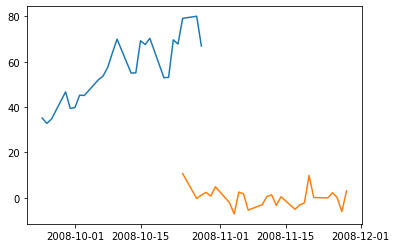

In [18]:
plt.plot(df_vix["Close"]["2008-09-24":"2008-10-28"])
plt.plot(df_dax["1Day Return"]["2008-10-24":"2008-11-28"])
plt.show

max_vix= df_vix[df_vix["High"] == max(df_vix["High"])]
max_vix

In [19]:
df_vix

dates = set(df_vix.index)
dates_dax = set(df_dax.index)
dates = dates.intersection(dates_dax)


df_dax.at[dates,"vix"] = df_vix["High"]

df_dax["vix"] = df_dax["vix"].interpolate(method='linear', limit_direction='forward', axis=0)




df_dax

,Open,High,Low,Close,Adj Close,Volume,1Day Return,2Day Return,3Day Return,4Day Return,5Day Return,vix
Date,,,,,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,4.057731,5.047698,5.885123,7.082493,3.192645,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,0.989967,1.827393,3.024763,-0.865086,-0.928903,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,0.837426,2.034796,-1.855053,-1.918870,-4.082157,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,1.197370,-2.692479,-2.756296,-4.919583,-4.023806,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,-3.889849,-3.953666,-6.116953,-5.221176,-7.504712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,15837.240234,15912.330078,15737.330078,15912.330078,15912.330078,62979800,NaN,NaN,NaN,NaN,NaN,25.889999
2022-01-21,15694.820312,15728.290039,15456.870117,15603.879883,15603.879883,105899500,NaN,NaN,NaN,NaN,NaN,29.790001
2022-01-24,15499.610352,15587.389648,14952.669922,15011.129883,15011.129883,115815500,NaN,NaN,NaN,NaN,NaN,38.939999


In [20]:
# pandas version rather than Keras.
def quantile_loss(q, y, f):
    # q: Quantile to be evaluated, e.g., 0.5 for median.
    # y: True value.
    # f: Fitted or predicted value.
    e = y - f
    return np.maximum(q * e, (q - 1) * e)

def tilted_loss(q, y, f):
    e = (y - f)
    return keras.backend.mean(keras.backend.maximum(q * e, (q - 1) * e), 
                              axis=-1)


In [21]:
optimizer = tf.optimizers.Adam(0.001)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [22]:
x_train = df_dax["vix"]["1990-01-02":"2021-07-01"]
x_test = df_dax["vix"]["2021-07-01":]

y_train = df_dax["1Day Return"]["1990-01-02":"2021-07-01"]
y_test = df_dax["1Day Return"]["2021-07-01":]

In [23]:
EPOCHS = 200
BATCH_SIZE = 32
UNITS = 512

In [24]:
def gb_quantilekeras_pred(x_train, train_labels, q):
    print(q)
    # Set input_dim for the number of features.
    if len(x_train.shape) == 1:
        input_dim = 1
    else:
        input_dim = x_train.shape[1]
    model = keras.Sequential([
      keras.layers.Dense(UNITS, activation=tf.nn.relu,
                         input_dim=input_dim),
      keras.layers.Dense(UNITS, activation=tf.nn.relu),
      keras.layers.Dense(1)
    ])
    
    model.compile(loss=lambda y, f: tilted_loss(q, y, f), optimizer=optimizer)
    model.fit(x_train, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE,
              verbose=0, validation_split=0.2, callbacks=[early_stop])
    
    # Predict the quantile
    return model

In [26]:
N_ESTIMATORS = 1000
def gb_quantile(X_train, train_labels,X, q):
    gbf = ensemble.GradientBoostingRegressor(loss='quantile', alpha=q,
                                             n_estimators=N_ESTIMATORS,
                                             max_depth=3,
                                             learning_rate=0.1, min_samples_leaf=9,
                                             min_samples_split=9)
    gbf.fit(X_train, train_labels)
    return gbf, gbf.predict(X)

In [27]:
x_test = df_dax["vix"]["2021-11-10":]
x_test 



Date
2021-11-10    19.900000
2021-11-11    18.389999
2021-11-12    17.690001
2021-11-15    17.459999
2021-11-16    17.080000
2021-11-17    17.190001
2021-11-18    18.150000
2021-11-19    19.010000
2021-11-22    19.590000
2021-11-23    20.910000
2021-11-24    20.959999
2021-11-25    24.974999
2021-11-26    28.990000
2021-11-29    25.690001
2021-11-30    28.559999
2021-12-01    32.610001
2021-12-02    30.680000
2021-12-03    35.320000
2021-12-06    30.820000
2021-12-07    24.690001
2021-12-08    23.110001
2021-12-09    22.120001
2021-12-10    21.299999
2021-12-13    21.180000
2021-12-14    23.000000
2021-12-15    23.469999
2021-12-16    22.129999
2021-12-17    23.260000
2021-12-20    27.389999
2021-12-21    22.680000
2021-12-22    21.360001
2021-12-23    18.930000
2021-12-27    19.410000
2021-12-28    18.469999
2021-12-29    18.000000
2021-12-30    17.790001
2022-01-03    18.540001
2022-01-04    17.809999
2022-01-05    20.170000
2022-01-06    21.059999
2022-01-07    20.799999
2022-01-10 

In [23]:

x_train = df_dax["vix"]["1990-01-02":"2021-07-01"]
x_train = np.array(x_train)


x_test = df_dax["vix"]["2022-01-19"].reshape(-1,1)
x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)

In [25]:
print(x_train)


[17.23999977 18.19000053 19.21999931 ... 16.30999947 17.30999947
 16.01000023]


In [28]:
QUANTILES = [0.025,0.25,0.5,0.75,0.975]
x_train = df_dax["vix"]["1990-01-02":"2021-07-01"]
x_train = np.array(x_train)




 
x_test = df_dax["vix"]["2021-01-26"].reshape(-1,1)
x_test = np.array(x_test)
results_gb = []

for h in range(5):
    y_train = df_dax[f"{h+1}Day Return"]["1990-01-02":"2021-07-01"]
    model_1, pred1 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[0])
    model_2, pred2 = gb_quantile(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[1])
    model_3, pred3 = gb_quantile(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[2])
    model_4, pred4 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[3])
    model_5, pred5 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[4])

    results_gb.append([pred1,pred2,pred3,pred4,pred5])
    


In [ ]:
for h in range(5):
    y_train = df_dax[f"{h+1}Day Return"]["1990-01-02":"2021-07-01"]
    pred1 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[0])
    pred2 = gb_quantile(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[1])
    pred3 = gb_quantile(x_train.reshape(-1, 1), y_train, x_test,QUANTILES[2])
    pred4 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[3])
    pred5 = gb_quantile(x_train.reshape(-1, 1), y_train,x_test, QUANTILES[4])

    results_gb.append([pred1,pred2,pred3,pred4,pred5])

In [29]:
results_gb


resluts = list(results_gb)

results = pd.DataFrame(index = range(5),columns = range(5))
for i in range(5):
    for j in range(5):
        results.iloc[i,j] = results_gb[i][j][0]
        

results 



results

,0,1,2,3,4
0,-2.907134,-0.84721,0.044274,0.848385,2.76187
1,-4.322134,-1.240298,-0.039442,1.071199,3.946626
2,-5.2398,-1.502614,0.183707,1.562618,4.392824
3,-6.886324,-1.538081,0.326142,2.101373,4.969594
4,-6.156581,-2.114053,0.228414,2.376145,5.275647


In [30]:
results.to_csv("/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Predictions/Week_12/DAX",index=False,header=False)

In [169]:


model_1 = keras_pred(x_train, y_train, QUANTILES[0])
model_2 = keras_pred(x_train, y_train, QUANTILES[1])
model_3 = keras_pred(x_train, y_train, QUANTILES[2])
model_4 = keras_pred(x_train, y_train, QUANTILES[3])
model_5 = keras_pred(x_train, y_train, QUANTILES[4])

0.025
0.25
0.5
0.75
0.975


In [170]:
x_test = np.array(x_test)
x_test = x_test.reshape(-1, 1)
x_test 

r1 = model_1.predict(x_test)
r2 = model_2.predict(x_test)
r3 =model_3.predict(x_test)
r4 =model_4.predict(x_test)
r5 =model_5.predict(x_test)


In [181]:
r5

array([[1.8642938],
       [1.8071624],
       [1.95303  ],
       [2.0988977],
       [2.0624306],
       [2.5061114],
       [2.1219933],
       [2.0478442],
       [2.0125926],
       [2.0466285],
       [2.1171312],
       [2.1912806],
       [2.9680257],
       [2.710326 ],
       [2.3274238],
       [2.1608918],
       [2.0429816],
       [2.2751544],
       [2.4027886],
       [2.3031125],
       [2.1074066],
       [2.315268 ],
       [2.3335016],
       [2.4027886],
       [2.215592 ],
       [2.0867422],
       [2.045413 ],
       [2.0320415],
       [1.9907123],
       [1.9955748],
       [1.914132 ],
       [1.8290426],
       [2.0709395],
       [2.295819 ],
       [2.5486562],
       [2.9254808],
       [2.8233736],
       [2.22167  ],
       [2.0466285],
       [2.045413 ],
       [2.2605677],
       [2.1329334],
       [1.9603232],
       [1.9931436],
       [1.9493831],
       [1.9822035],
       [1.991928 ],
       [2.072763 ],
       [2.153598 ],
       [2.3055434],


In [ ]:
preds.loc[preds.method == 'QuantReg', 'pred'] = np.concatenate(
    [quantreg.fit(q=q).predict(X_test) for q in QUANTILES])

In [176]:
#quantile Regression 
#Change
tau = [2.5, 25, 50, 75, 97.5]

predictions_h = {}
for h in range(1,6):
    y_true_mean = 0 #by definition of daily returns 
    X =  abs(A[0].take(len(A[0])-1)).reshape(-1, 1)
    X_train = A[0][-(1000+h):-h].reshape(-1, 1)  # last 1000 daily returns
    y_train = A[h-1][-1000:] # followed h- step return


    quantiles = [i/100 for i in tau]
    predictions = {}
    out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0).fit(X_train, y_train)
        y_pred = qr.predict(X)
        predictions[quantile] = y_pred
        print(y_pred)
        #if quantile == min(quantiles):
        #    out_bounds_predictions = np.logical_or(
        #        out_bounds_predictions, y_pred >= y_train
         #   )
        #elif quantile == max(quantiles):
        #    out_bounds_predictions = np.logical_or(
        #        out_bounds_predictions, y_pred <= y_train
         #   )
    predictions_h[h] = predictions       

[-2.64894504]
[-0.47990873]
[0.07766716]
[0.6560946]
[2.29215149]
[-4.00491526]
[-0.76488063]
[0.16404084]
[0.90931944]
[3.13176057]
[-4.79087501]
[-0.83234025]
[0.17252311]
[1.21861506]
[3.96296334]
[-5.15382911]
[-0.96626705]
[0.23455031]
[1.3951978]
[4.87591302]
[-5.91218418]
[-1.07122018]
[0.36803665]
[1.47806466]
[5.42712002]


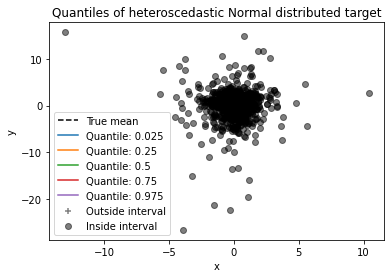

In [13]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    X_train[out_bounds_predictions],
    y_train[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    X_train[~out_bounds_predictions],
    y_train[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")

In [31]:

filename = "/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Predictions/Week_11/DAX_help"
pred_results.to_csv(filename, header=False, index = False)


filename2 = "/Users/finnbrunnenkant/Desktop/Master KIT/Semester 4/Probalistic TS/Predictions/Week_11/DAX"

import csv
import string

input_file = open(filename, 'r')
output_file = open(filename2, 'w')
data = csv.reader(input_file)
writer = csv.writer(output_file)
special1 = ']'
special2 = '['

for line in data:
    line = [value.replace(special1, '') for value in line]
    line = [value.replace(special2, '') for value in line]
    writer.writerow(line)

input_file.close()
output_file.close() 



NameError: name 'pred_results' is not defined